# Text summarizer

In [48]:
import nltk
import re
from newspaper import Article

In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kamil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Downloading and parsing article from web

In [50]:
# getting article content from url using newspaper package
def get_article(url):
    """
    function that scrapes and parses article from web (link),
    some of informations about article are presented (keywords, title)
    
    Args:
        url (url): url address to article
    Returns:
        article.text (str): article text content extracted from given url 
                            by newspaper Article package
    """
    article = Article(url, language='en')
    article.download()
    article.parse()
    article.nlp()
    print("Article title: \n \t",article.title)
    print("\nArticle keywords: \n",article.keywords)
    return article.text

In [51]:
# downloading article about investing in gold
article_url = 'https://www.investopedia.com/articles/basics/08/gold-strategies.asp'
document = get_article(article_url)

Article title: 
 	 How to Invest in Gold: An Investors Guide

Article keywords: 
 ['value', 'way', 'mutual', 'guide', 'investment', 'invest', 'bullion', 'price', 'gold', 'futures', 'funds', 'investors', 'coins']


In [52]:
print(document)

From the time of ancient civilizations to the modern era, gold has been the world's currency of choice. Today, investors buy gold mainly as a hedge against political unrest and inflation. In addition, many top investment advisors recommend a portfolio allocation in commodities, including gold, in order to lower overall portfolio risk.

We'll cover many of the opportunities for investing in gold, including bullion (i.e., gold bars), mutual funds, futures, mining companies, and jewelry. With few exceptions, only bullion, futures, and a handful of specialty funds provide a direct investment opportunity in gold. Other investments derive part of their value from other sources.

Key Takeaways So, you've decided to buy some gold for your investment portfolio, but how should you go about doing that?

The most direct way to own gold is to purchase physical gold bars or coins, but these can be illiquid and must be stored securely.

ETFs and mutual funds that track the price of gold are also popu

## Text preprocessing

In [53]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def preprocess(doc):
    """
    function that preprocesses the article:
    digits, special symbols, extra spaces, headers and stop words are removed by regex patterns
    
    Args:
        doc(str): text to preprocess
    Returns:
        result(list): list of words(str) left after regex operations and stop words removal
    """
    doc = re.sub('\n\n((\w+\s){0,6})\n', '', doc)
    doc = re.sub('((\d+))', '', doc).lower()
    doc = re.sub('[\W+]', ' ', doc)
    doc = re.sub('(\s\s+)', ' ', doc)
    doc = re.sub('\s\w{1}\s', '', doc)
    result = [x for x in doc.split() if x not in stop_words]
    
    return result

In [54]:
preprocessed = preprocess(document)
print(len(preprocessed))

891


In [55]:
from nltk.stem import PorterStemmer

In [56]:
def count_fq(doc):
    """
    function that counts occurence of stemmed (using Porter Stemmer) words in whole article
    after counting words, score is weighted by highest occurence counter
    
    Args:
        doc(str): document that word scores are counted on
    Returns:
        word_fq(dict): dictionary of stemmed words (keys) and weighted scores (values)
    """
    word_fq = dict()
    stem = PorterStemmer()
    
    for i in doc:
        i = stem.stem(i)
        if i not in word_fq:
            word_fq[i] = 1
        else:
            word_fq[i] += 1
    
    max_fq = max(word_fq.values())
    
    for v in word_fq:
        word_fq[v] /= max_fq
    return word_fq 

In [57]:
word_fq = count_fq(preprocessed)

In [58]:
word_fq

{'time': 0.0821917808219178,
 'ancient': 0.0136986301369863,
 'civil': 0.0136986301369863,
 'modern': 0.0136986301369863,
 'era': 0.0136986301369863,
 'gold': 1.0,
 'worldcurr': 0.0136986301369863,
 'choic': 0.0136986301369863,
 'today': 0.0136986301369863,
 'investor': 0.1780821917808219,
 'buy': 0.136986301369863,
 'mainli': 0.0136986301369863,
 'ashedg': 0.0136986301369863,
 'polit': 0.0136986301369863,
 'unrest': 0.0136986301369863,
 'inflat': 0.0136986301369863,
 'addit': 0.0136986301369863,
 'mani': 0.1232876712328767,
 'top': 0.0136986301369863,
 'invest': 0.4657534246575342,
 'advisor': 0.0136986301369863,
 'recommendportfolio': 0.0136986301369863,
 'alloc': 0.0136986301369863,
 'commod': 0.0273972602739726,
 'includ': 0.0684931506849315,
 'order': 0.0136986301369863,
 'lower': 0.0547945205479452,
 'overal': 0.0136986301369863,
 'portfolio': 0.0410958904109589,
 'risk': 0.0273972602739726,
 'cover': 0.0136986301369863,
 'opportun': 0.0273972602739726,
 'bullion': 0.191780821917

### Couting score for each sentence

In [59]:
from nltk.tokenize import word_tokenize, sent_tokenize

def count_score(article, word_fq):
    """
    function that counts score for each sentence in article:
        sum of all words scores in each sentence if they occur in word_fq dictionary
        
    Args:
        article(str): full article text
        word_fq(dict): dictionary of words (keys) with weighted scores (values)
    Returns:
        scores(dict): dictionary of whole sentences (keys) with counted scores (values)
    """
    scores = dict()
    sentences = sent_tokenize(article)
    stem = PorterStemmer()
    
    for s in sentences:
        word = word_tokenize(s)
        for wd in word:
            w = stem.stem(wd).lower()
            if (w not in stop_words) and (w in word_fq.keys()):
                if s not in scores.keys():
                    scores[s] = word_fq[w]
                else:
                    scores[s] += word_fq[w]
    return scores

In [60]:
sentences_scores = count_score(document,word_fq)

In [61]:
for k in sentences_scores:
    print(k,'\n',sentences_scores[k],'\n\n')

From the time of ancient civilizations to the modern era, gold has been the world's currency of choice. 
 1.1643835616438358 


Today, investors buy gold mainly as a hedge against political unrest and inflation. 
 1.397260273972603 


In addition, many top investment advisors recommend a portfolio allocation in commodities, including gold, in order to lower overall portfolio risk. 
 1.9315068493150687 


We'll cover many of the opportunities for investing in gold, including bullion (i.e., gold bars), mutual funds, futures, mining companies, and jewelry. 
 3.9589041095890414 


With few exceptions, only bullion, futures, and a handful of specialty funds provide a direct investment opportunity in gold. 
 2.2739726027397262 


Other investments derive part of their value from other sources. 
 0.6849315068493151 


Key Takeaways So, you've decided to buy some gold for your investment portfolio, but how should you go about doing that? 
 1.7123287671232876 


The most direct way to own gold 

 1.9863013698630136 


As an art form, gold jewelry is beautiful. 
 1.2191780821917808 


As an investment, it is mediocre—unless you are the jeweler. 
 0.4794520547945205 


The Bottom Line

Larger investors wishing to have direct exposure to the price of gold may prefer to invest in gold directly through bullion. 
 3.3835616438356166 


There is also a level of comfort found in owning a physical asset instead of simply a piece of paper. 
 0.2328767123287671 


The downside is the slight premium to the value of gold paid on the initial purchase, as well as the storage costs. 
 1.3835616438356164 


For investors who are a bit more aggressive, futures and options will certainly do the trick. 
 0.5205479452054795 


But, buyer beware: These investments are derivatives of gold's price, and can see sharp moves up and down, especially when done on margin. 
 1.9041095890410962 


On the other hand, futures are probably the most efficient way to invest in gold, except for the fact that contr

In [62]:
# sorting scores in descending order - sentences with biggest scores hold "most information"
sorted_scores = sorted(sentences_scores.items(),key=lambda x: x[1], reverse=True)

### Creating summary

In [63]:
def summary(scores,n_sent=8,max_len=30,show_score=False):
    """
    function that creates summary of article based on n sentences with highest scores
        and given max length of sentence
    
    Args:
        scores(dict): dictionary of whole sentences (keys) with counted scores (values)
        n_sent(int): number of sentences in created summary
        max_len(int): max number of words in sentence, longer sentences are ignored
    Returns:
        summary(str): article summary that consists of n_sent sentences
    """
    counter = 0
    summary = ''
    for i in scores:
        if counter < n_sent:
            if len(i[0].split(' ')) < max_len:
                if show_score:
                    summary += i[0] + '\t\t' + str(i[1]) + '\n' 
                else:
                    summary += i[0] + '\n' 
                counter += 1
        else:
            return summary

In [64]:
article_summary = summary(sorted_scores)

In [65]:
print(article_summary)

We'll cover many of the opportunities for investing in gold, including bullion (i.e., gold bars), mutual funds, futures, mining companies, and jewelry.
Gold ETFs and Mutual Funds

One alternative to a direct purchase of gold bullion is to invest in one of the gold-based exchange-traded funds (ETFs).
Instead, the average gold investor should consider gold-oriented mutual funds and ETFs, as these securities generally provide the easiest and safest way to invest in gold.
The Bottom Line

Larger investors wishing to have direct exposure to the price of gold may prefer to invest in gold directly through bullion.
For the average gold investor, however, mutual funds and ETFs are now generally the easiest and safest way to invest in gold.
Gold coins are often minted in smaller sizes (one ounce or less), making them a more convenient way to invest in gold than the larger bars.
Even so, gold mining companies may provide a safer way to invest in gold than through direct ownership of bullion.
Gold

### Data visualization

In [66]:
import matplotlib.pyplot as plt

In [67]:
import seaborn as sns
import pandas as pd

In [68]:
df_counts = pd.DataFrame()

In [69]:
df_counts['word'] = word_fq.keys()
df_counts['score'] = word_fq.values()

In [70]:
df_counts.head()

,word,score
0,time,0.082192
1,ancient,0.013699
2,civil,0.013699
3,modern,0.013699
4,era,0.013699


In [71]:
df_counts.sort_values(by='score', ascending=False, inplace=True, ignore_index=True)

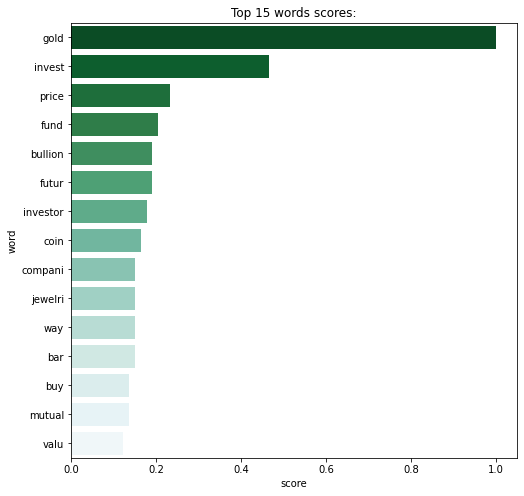

In [72]:
# horizontal barplot showing top n words scores
top_n = 15
clr = sns.color_palette("BuGn",n_colors=top_n)
clr.reverse()
fig = plt.figure(figsize=[8,8])
sns.barplot(x = 'score', y = 'word', data = df_counts[:top_n], palette = clr).set(title=f'Top {top_n} words scores:')
plt.show()

In [73]:
from collections import Counter
from nltk.util import ngrams

In [74]:
top_ngrams = 10
bigrams = Counter(ngrams(article_summary.split(), 2)).most_common(top_ngrams)
trigrams = Counter(ngrams(article_summary.split(), 3)).most_common(top_ngrams)

In [75]:
df_bigrams = pd.DataFrame(bigrams,columns=['bi-gram','count'])
df_trigrams = pd.DataFrame(trigrams,columns=['tri-gram','count'])

In [76]:
df_bigrams

,bi-gram,count
0,"(to, invest)",6
1,"(invest, in)",6
2,"(way, to)",4
3,"(in, gold)",3
4,"(of, the)",2
5,"(of, gold)",2
6,"(the, average)",2
7,"(average, gold)",2
8,"(mutual, funds)",2
9,"(funds, and)",2


In [77]:
df_trigrams

,tri-gram,count
0,"(to, invest, in)",6
1,"(way, to, invest)",4
2,"(invest, in, gold)",3
3,"(the, average, gold)",2
4,"(mutual, funds, and)",2
5,"(the, easiest, and)",2
6,"(easiest, and, safest)",2
7,"(and, safest, way)",2
8,"(safest, way, to)",2
9,"(invest, in, gold.)",2


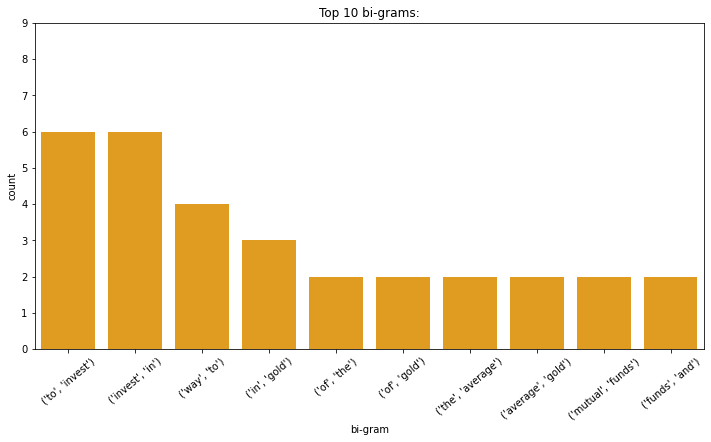

In [78]:
plt.figure(figsize=(12,6))
plot_bi = sns.barplot(x = 'bi-gram', y = 'count', data = df_bigrams, color='orange')
plot_bi.set(title=f'Top {top_ngrams} bi-grams:')
plt.xticks(rotation=40)
plt.ylim(0,df_bigrams["count"].max()+3)
plt.show()

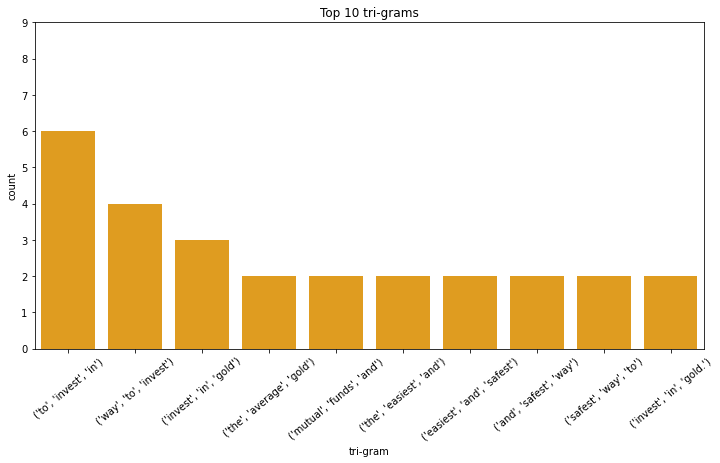

In [79]:
plt.figure(figsize=(12,6))
plot_tri = sns.barplot(x = 'tri-gram', y = 'count', data = df_trigrams, color = 'orange')
plot_tri.set(title=f'Top {top_ngrams} tri-grams')
plt.xticks(rotation=40)
plt.ylim(0,df_trigrams['count'].max()+3)
plt.show()

In [80]:
# count most common words in summary
def count_keywords(summary,keywords):
    result = dict()
    stem = PorterStemmer()
    doc = sent_tokenize(summary.lower())
    
    for s in doc:
        words = word_tokenize(s)
        for w in words:
            stemmed = stem.stem(w)
            if stemmed in keywords and stemmed not in result.keys():
                result[w] = summary.count(w)
    return result

In [81]:
summary_keywords = count_keywords(article_summary,df_counts['word'][:top_n].values)

In [82]:
summary_keywords = dict(sorted(summary_keywords.items(), key=lambda x:x[1], reverse=True))

In [83]:
# count of most frequent keywords in summary
summary_keywords

{'gold': 15,
 'invest': 10,
 'bullion': 4,
 'funds': 4,
 'way': 4,
 'mutual': 3,
 'investor': 3,
 'bars': 2,
 'companies': 2,
 'future': 2,
 'investing': 1,
 'futures': 1,
 'jewelry': 1,
 'price': 1,
 'coins': 1,
 'buy': 1}